## Style Transfer with Images

In [4]:
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

print("TF Version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.config.list_physical_devices('GPU'))


TF Version:  2.15.0
TF Hub version:  0.16.1
Eager mode enabled:  True
GPU available:  []


### Functions

In [45]:
def load_image(image_path, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Load and detects whether an image is a BMP, GIF, JPEG, or PNGconvert
  # to convert float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

def show_images(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()

In [36]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

### Experiments

In [47]:
img_size = (256, 256)
content_image_path = 'images/labrador.jpg'
style_image_path = 'images/the_great_wave_off_kanagawa.jpg'

content_image = load_image(content_image_path, img_size)
style_image = load_image(style_image_path, img_size)
#style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')

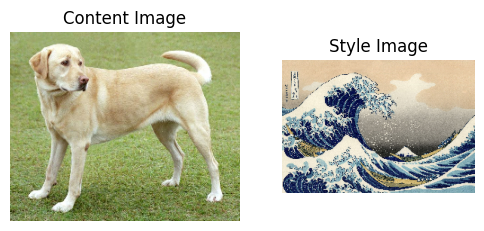

In [49]:
show_images([content_image, style_image], ['Content Image', 'Style Image'])

### Fast Style Transfer using TF-Hub

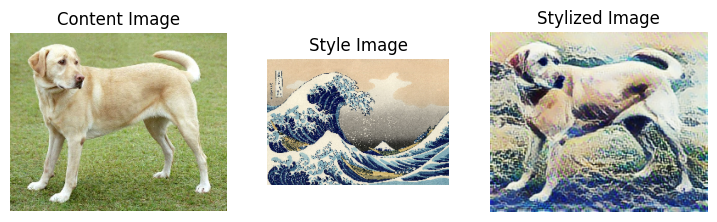

In [58]:
# Load image stylization module.
hub_module = hub.load('https://kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/1')

# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]
tf.keras.utils.save_img('images/stylized_labrador.jpg', stylized_image[0])

show_images([content_image, style_image, stylized_image], ['Content Image', 'Style Image', 'Stylized Image'])